In [8]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import docx

In [9]:
#making a df by importing the values from the human cell reads txt

df = pd.read_csv('human_reads.txt', sep='\t', header=None)
header = ['chr', 'start_pos','end_pos','human_reads']
df.columns = header[:len(df.columns)]
df['chr'] = df['chr'].str.replace('chr','').astype(int) #CHR COLUMN
df = df.reset_index()

In [10]:
#making another df from the mutated reads file
mutated = pd.read_csv('altered_reads.txt', sep='\t', header=None)
header = ['chromosome', 'start_pos','end_pos','mutated_reads']
mutated.columns = header[:len(mutated.columns)]
mutated

,chromosome,start_pos,end_pos,mutated_reads
0,chr1,0,5000000,960
1,chr1,5000000,10000000,994
2,chr1,10000000,15000000,920
3,chr1,15000000,20000000,1012
4,chr1,20000000,25000000,918
...,...,...,...,...
582,chr22,30000000,35000000,1004
583,chr22,35000000,40000000,912
584,chr22,40000000,45000000,996
585,chr22,45000000,50000000,1028


In [11]:
mutated['CHR'] = mutated['chromosome'].str.replace('chr','').astype(int) #CHR COLUMN

In [12]:
#adding the mutated reads column to the original  df
df['mutated_reads'] = mutated['mutated_reads'].values
df


,index,chr,start_pos,end_pos,human_reads,mutated_reads
0,0,1,0,5000000,972,960
1,1,1,5000000,10000000,1040,994
2,2,1,10000000,15000000,1066,920
3,3,1,15000000,20000000,952,1012
4,4,1,20000000,25000000,1038,918
...,...,...,...,...,...,...
582,582,22,30000000,35000000,984,1004
583,583,22,35000000,40000000,1028,912
584,584,22,40000000,45000000,1012,996
585,585,22,45000000,50000000,970,1028


In [18]:
#making RDR column
df['RDR'] = (df['mutated_reads'] / df['human_reads']) * (df['human_reads'].sum() / df['mutated_reads'].sum())
df

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
0,0,1,0,5000000,972,960,1.101386
1,1,1,5000000,10000000,1040,994,1.065829
2,2,1,10000000,15000000,1066,920,0.962421
3,3,1,15000000,20000000,952,1012,1.185436
4,4,1,20000000,25000000,1038,918,0.986234
...,...,...,...,...,...,...,...
582,582,22,30000000,35000000,984,1004,1.137819
583,583,22,35000000,40000000,1028,912,0.989319
584,584,22,40000000,45000000,1012,996,1.097522
585,585,22,45000000,50000000,970,1028,1.181832


In [20]:
df['chromosome'] = df['chr'].str.replace('chr','').astype(int) #CHR COLUMN

KeyError: 'chromosome'

In [6]:
len(df)

587

ANALYSIS

--------------- CHR8, NORMAL COPY NUMBER -----------------------------------

In [7]:
chr20 = df[df['chr']==20] #what a normal copy number RDR looks like. 


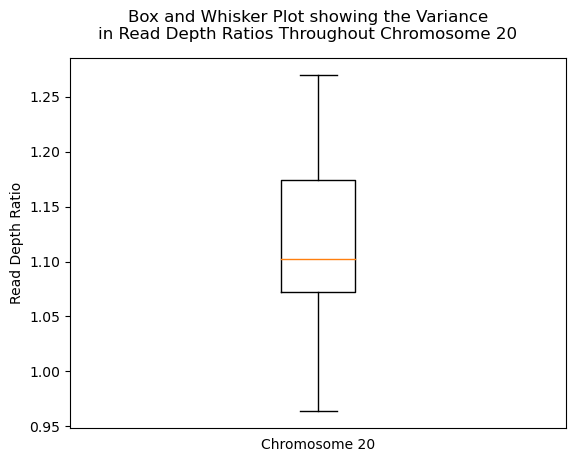

In [8]:
red_circle = dict(markerfacecolor='red', marker='o')

plt.boxplot(x=chr20.loc[:,'RDR'], flierprops=red_circle)

plt.suptitle("""Box and Whisker Plot showing the Variance 
in Read Depth Ratios Throughout Chromosome 20 """)

plt.xlabel('Chromosome 20')
plt.xticks([])
plt.ylabel('Read Depth Ratio')

plt.savefig('Norm_chr20.png', dpi=200 )
plt.show()



In [9]:
chr20.loc[:,'RDR'].describe()

count    13.000000
mean      1.119440
std       0.086955
min       0.964165
25%       1.072509
50%       1.101956
75%       1.173980
max       1.269899
Name: RDR, dtype: float64

In [10]:
chr20.loc[:,'RDR'].quantile(0.95)

1.26480130445798

In [11]:
# UQ_chr8 = chr8.loc[:,'RDR'].quantile(0.75)
# LQ_chr8 = chr8.loc[:,'RDR'].quantile(0.25)
# IQR_chr8 = UQ_chr8-LQ_chr8
# upper_outliers_chr8 = UQ_chr8 + (1.25*IQR_chr8)
# lower_outliers_chr8 = LQ_chr8 - (1.25*IQR_chr8)

In [12]:
# IQR_chr8

In [13]:
# chr8_without_outliers = chr8[[chr8['RDR'] < upper_outliers_chr8] and chr8['RDR'] > lower_outliers_chr8] 
# chr8_without_outliers.loc[:,'RDR'].mean()

---------------- CHR2 : HOMOZYGOUS DELETION ----------------------

In [27]:
chr2 = df[df['chr']==2] #what a homozgyous copy number RDR looks like. 
len(chr2)

49

In [28]:
chr2_above_zero = chr2[chr2['RDR'] > 0]
len(chr2_above_zero)

36

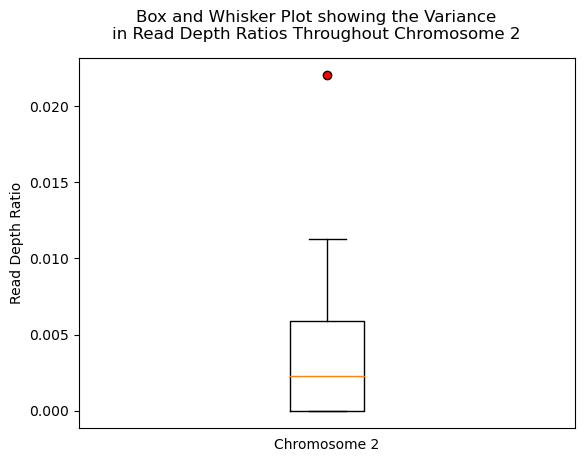

In [29]:
red_circle = dict(markerfacecolor='red', marker='o')

plt.boxplot(x=chr2.loc[:,'RDR'], flierprops=red_circle)

plt.suptitle("""Box and Whisker Plot showing the Variance 
in Read Depth Ratios Throughout Chromosome 2 """)

plt.xlabel('Chromosome 2')
plt.xticks([])
plt.ylabel('Read Depth Ratio')

plt.savefig('HD_chr2.png', dpi=200 )

plt.show()



In [26]:
chr2.loc[:,'RDR'].quantile(q=0.95) #95% quantile

AttributeError: 'AxesSubplot' object has no attribute 'loc'

In [18]:
chr2.loc[:,'RDR'].quantile(q=0.98) #98% quantile

0.011673846991221195

In [19]:
chr2.loc[:,'RDR'].quantile(q=0.90) #90% quantile

0.0071366741222460795

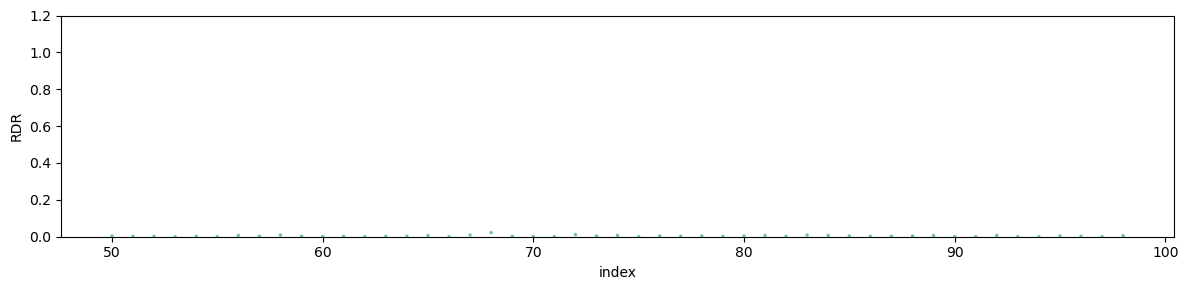

In [20]:
# plt.figure(figsize=(12,3))
# chr2 = sns.scatterplot(data=chr2, x='index', y='RDR', hue='chr', legend=False, palette='Set2', s=7) #look up how to move legend from graph

# chr2.set_ylim(0, 1.2)

# plt.tight_layout()

# plt.savefig('chr2_large_scatterplot', dpi=200 )

In [30]:
chr2.loc[:,'RDR'].describe()

count    49.000000
mean      0.003675
std       0.003943
min       0.000000
25%       0.000000
50%       0.002299
75%       0.005869
max       0.022051
Name: RDR, dtype: float64

In [22]:
UQ_chr2 = chr2.loc[:,'RDR'].quantile(0.75)
LQ_chr2 = chr2.loc[:,'RDR'].quantile(0.25)
IQR_chr2 = (UQ_chr2) -(LQ_chr2)
upper_outliers_chr2 = UQ_chr2 + (1.25* IQR_chr2)

AttributeError: 'AxesSubplot' object has no attribute 'loc'

In [ ]:
IQR_chr2

0.004703869540729234

In [ ]:
chr2[chr2['RDR'] > upper_outliers_chr2]  #only 3 values with an RDR above 0.0333

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR
68,68,2,90000000,95000000,708,12,0.019573
72,72,2,110000000,115000000,992,14,0.016298
98,98,2,240000000,242193529,380,8,0.024312


In [ ]:
chr2_without_outliers = chr2[chr2['RDR'] < upper_outliers_chr2] 
chr2_without_outliers.loc[:,'RDR'].mean()

0.002774207684624865

---------------- CHR17 : HETEROZYGOUS DELETION ----------------------

In [ ]:
chr17 = df[df['chr']==17]
len(chr17)

17

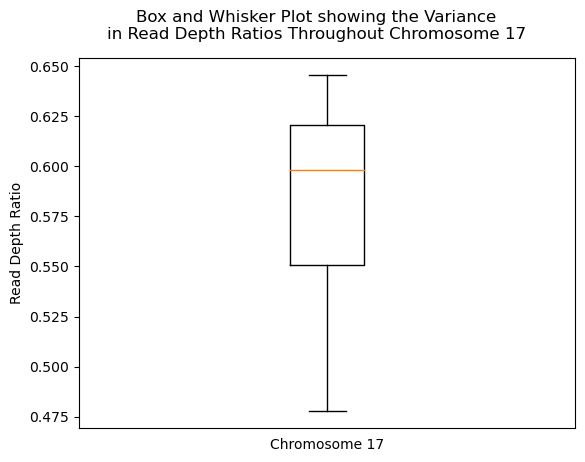

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o')

plt.boxplot(x=chr17.loc[:,'RDR'], flierprops=red_circle)

plt.suptitle("""Box and Whisker Plot showing the Variance 
in Read Depth Ratios Throughout Chromosome 17 """)
             
plt.xlabel('Chromosome 17')
plt.xticks([])
plt.ylabel('Read Depth Ratio')

plt.savefig('Het_D_chr17.png', dpi=200 )
plt.show()



In [ ]:
chr17.loc[:,'RDR'].describe()

count    17.000000
mean      0.581728
std       0.050447
min       0.477927
25%       0.550619
50%       0.598065
75%       0.620378
max       0.645695
Name: RDR, dtype: float64

In [ ]:
UQ_chr17 = chr17.loc[:,'RDR'].quantile(0.75)
LQ_chr17 = chr17.loc[:,'RDR'].quantile(0.25)
IQR_chr17 = (UQ_chr17) -(LQ_chr17)
upper_outliers_chr17 = UQ_chr17 + (1.25* IQR_chr17)

In [ ]:
IQR_chr17

0.06975906791791975

In [ ]:
chr17[chr17['RDR'] > upper_outliers_chr17]  #only 3 values with an RDR above 0.0333

,index,chr,start_pos,end_pos,human_reads,mutated_reads,RDR


In [ ]:
chr17_without_outliers = chr17[chr17['RDR'] < upper_outliers_chr17] 
chr17_without_outliers.loc[:,'RDR'].mean()

0.581728161994339

In [ ]:
chr17.loc[:,'RDR'].quantile(0.95)

0.6405503379095603

MAPPING THESE ALL ON THE SAME GRAPH

Decided it's not a good comparison

In [ ]:

combined_dfs = pd.DataFrame({'2': chr2['RDR'],
                             '8': chr8['RDR'],
                             '17': chr17['RDR'],
                             })
combined_dfs

sns.set_style('white')
sns.boxplot(data=combined_dfs, palette='flare')
plt.suptitle("""Box and Whisker Plot showing the Variance 
in Read Depth Ratios Throughout Chromosomes """)
plt.xlabel('Chromosome')
plt.ylabel('Read Depth Ratio')
sns.despine()
plt.savefig('combined_RDR', dpi=200 )
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

GENOME WIDE RDR 

In [21]:
chromosome_pos = df.groupby('chr')['index'].first()

In [ ]:

# sns.barplot(x= df_prop_HD_threshold['index'], y=df_prop_HD_threshold['PROP_HD'], color= 'green')

# chromosome_pos = df_prop_HD_threshold.groupby('CHR')['index'].first()

# plt.xticks(chromosome_pos.values, chromosome_pos.index)

# for starting_pos in chromosome_pos.values:
#     plt.axvline(x=starting_pos, linewidth=1.0, color='black', linestyle='-')

# plt.xlabel('Chromosome')

# threshold = 0.003

# plt.ylabel('Proportion of HDs in Genetic Locus')

# plt.axhline(y=0.010144, color='r', linestyle='-')


# plt.ylim(0, 0.09)

# plt.title("""Frequency Plot showing the 
# Genome Wide Proportion of Homozygous Deletions in BC Patient S1, using HD threshold
#         """)

# plt.gcf().subplots_adjust(bottom=0.15)
# plt.savefig('FP_BC_P_S1_threshold.png', dpi=300)

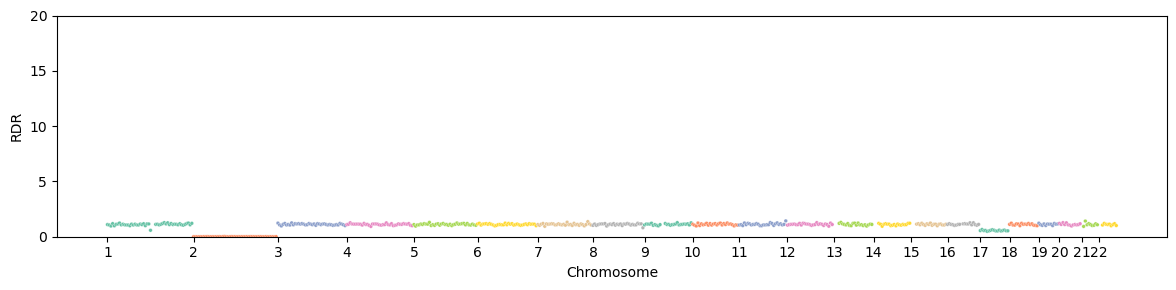

In [25]:
chromosome_pos = df.groupby('chr')['index'].first()

plt.figure(figsize=(12,3))
scatter = sns.scatterplot(data=df, x='index', y='RDR', hue='chr', legend=False, palette='Set2', s=7) #look up how to move legend from graph

plt.xticks(chromosome_pos.values, chromosome_pos.index)

# for starting_pos in chromosome_pos.values:
#     plt.axvline(x=starting_pos, linewidth=1.0, color='black', linestyle='-')

plt.xlabel('Chromosome')

scatter.set_ylim(0, 20)

plt.tight_layout()

plt.savefig('Genome_wide_RDR_large_updated', dpi=200 )